# Importing Libraries

In [1]:
import shap
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")

# Loading Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
# Loading Dataset
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Data Cleaning

In [3]:
# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Remove extra spaces in categorical values
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Convert Target Variable (Industry Logic)

In [4]:
df['default'] = df['loan_status'].map({'Approved': 0, 'Rejected': 1})

# Encoding Categorical Features

In [5]:
le = LabelEncoder()

df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])


# Feature Selection

In [6]:
X = df.drop(['loan_status', 'default','loan_id'], axis=1)
y = df['default']

# Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model Training

## Logistic Regression

In [8]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Accuracy:", acc_lr)
print("Logistic Regression ROC-AUC:", roc_lr)

Logistic Regression Accuracy: 0.8079625292740047
Logistic Regression ROC-AUC: 0.8871805635724407


## Random Forest

In [9]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Accuracy:", acc_rf)
print("Random Forest ROC-AUC:", roc_rf)

Random Forest Accuracy: 0.9824355971896955
Random Forest ROC-AUC: 0.9979476774355297


## XGBoost

In [10]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

acc_xgb = accuracy_score(y_test, y_pred_xgb)
roc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("XGBoost Accuracy:", acc_xgb)
print("XGBoost ROC-AUC:", roc_xgb)

XGBoost Accuracy: 0.9789227166276346
XGBoost ROC-AUC: 0.9986531633170663


 # Predictions for All Models

In [11]:
# Logistic Regression
y_pred_lr = lr.predict(X_test)

# Random Forest
y_pred_rf = rf.predict(X_test)

# XGBoost
y_pred_xgb = xgb.predict(X_test)


# Classification Report for 3 Models

In [12]:
print("===== Logistic Regression Classification Report =====")
print(classification_report(y_test, y_pred_lr))

print("===== Random Forest Classification Report =====")
print(classification_report(y_test, y_pred_rf))

print("===== XGBoost Classification Report =====")
print(classification_report(y_test, y_pred_xgb))

===== Logistic Regression Classification Report =====
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       531
           1       0.82      0.63      0.71       323

    accuracy                           0.81       854
   macro avg       0.81      0.77      0.78       854
weighted avg       0.81      0.81      0.80       854

===== Random Forest Classification Report =====
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.96      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

===== XGBoost Classification Report =====
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.97      0.97       323

    accuracy                          

In [13]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

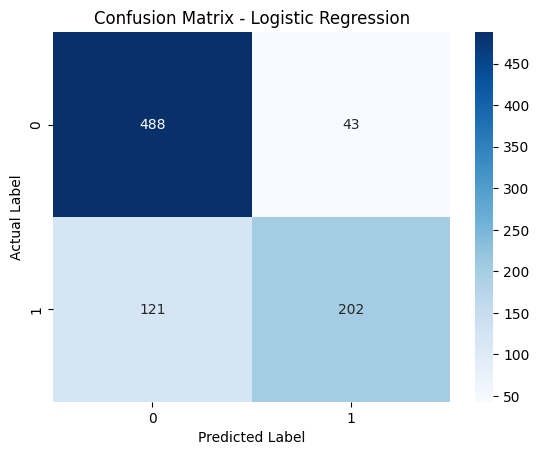

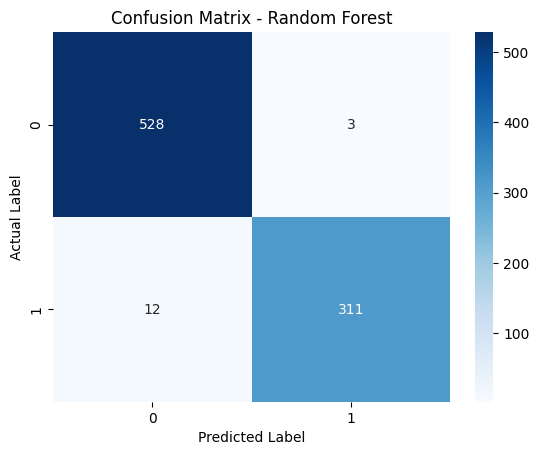

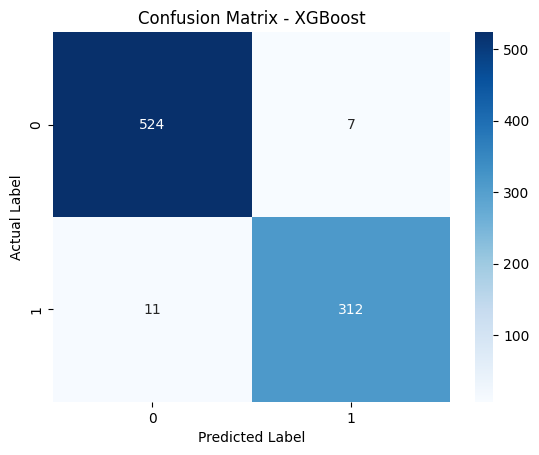

In [14]:
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

# Final Model Verdict

In [15]:
def get_metrics(model, X_train, y_train, X_test, y_test):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Probabilities (for ROC-AUC)
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_prob)
    report = classification_report(y_test, y_test_pred, output_dict=True)
    f1 = report["1"]["f1-score"]  # class 1 = default/approved depending on encoding

    return train_acc, test_acc, roc_auc, f1

# Calculate metrics for each model
train_acc_lr, test_acc_lr, roc_lr, f1_lr = get_metrics(lr, X_train, y_train, X_test, y_test)
train_acc_rf, test_acc_rf, roc_rf, f1_rf = get_metrics(rf, X_train, y_train, X_test, y_test)
train_acc_xgb, test_acc_xgb, roc_xgb, f1_xgb = get_metrics(xgb, X_train, y_train, X_test, y_test)


In [16]:
models_results = {
    "Logistic Regression": {
        "train_acc": train_acc_lr,
        "test_acc": test_acc_lr,
        "roc_auc": roc_lr,
        "f1": f1_lr
    },
    "Random Forest": {
        "train_acc": train_acc_rf,
        "test_acc": test_acc_rf,
        "roc_auc": roc_rf,
        "f1": f1_rf
    },
    "XGBoost": {
        "train_acc": train_acc_xgb,
        "test_acc": test_acc_xgb,
        "roc_auc": roc_xgb,
        "f1": f1_xgb
    }
}

print("📊 MODEL EVALUATION REPORT\n")

best_model = None
best_score = -1

for model, m in models_results.items():
    overfit_gap = abs(m["train_acc"] - m["test_acc"])

    print(f"🔹 {model}")
    print(f"   Train Accuracy  : {m['train_acc']:.4f}")
    print(f"   Test Accuracy   : {m['test_acc']:.4f}")
    print(f"   ROC-AUC         : {m['roc_auc']:.4f}")
    print(f"   F1-score (Class 1): {m['f1']:.4f}")
    print(f"   Overfitting Gap : {overfit_gap:.4f}")

    # Industry scoring logic (generalization > accuracy)
    final_score = (
        m["test_acc"] * 0.30 +
        m["roc_auc"] * 0.35 +
        m["f1"] * 0.25 -
        overfit_gap * 0.4   # strong penalty for overfitting
    )

    # Industry preference: boosting models are more stable than RF
    if model == "XGBoost":
        final_score += 0.02  # stability bonus

    print(f"   Final Score     : {final_score:.4f}\n")

    if final_score > best_score:
        best_score = final_score
        best_model = model

print("🏆 FINAL VERDICT")
print(f"✅ Selected Model: {best_model}")
print("💡 Reason: Best trade-off between predictive power, stability, and generalization.")


📊 MODEL EVALUATION REPORT

🔹 Logistic Regression
   Train Accuracy  : 0.7906
   Test Accuracy   : 0.8080
   ROC-AUC         : 0.8872
   F1-score (Class 1): 0.7113
   Overfitting Gap : 0.0173
   Final Score     : 0.7238

🔹 Random Forest
   Train Accuracy  : 1.0000
   Test Accuracy   : 0.9824
   ROC-AUC         : 0.9979
   F1-score (Class 1): 0.9765
   Overfitting Gap : 0.0176
   Final Score     : 0.8811

🔹 XGBoost
   Train Accuracy  : 0.9997
   Test Accuracy   : 0.9789
   ROC-AUC         : 0.9987
   F1-score (Class 1): 0.9720
   Overfitting Gap : 0.0208
   Final Score     : 0.8979

🏆 FINAL VERDICT
✅ Selected Model: XGBoost
💡 Reason: Best trade-off between predictive power, stability, and generalization.


# Selecting Best Model

In [17]:
best_model = xgb

# Business Risk Scoring Logic

In [18]:
def risk_level(prob):
    if prob < 0.3:
        return "Low Risk"
    elif prob < 0.6:
        return "Medium Risk"
    else:
        return "High Risk"

In [19]:
sample_prob = y_pred_xgb[0]
risk_level(sample_prob)

'Low Risk'

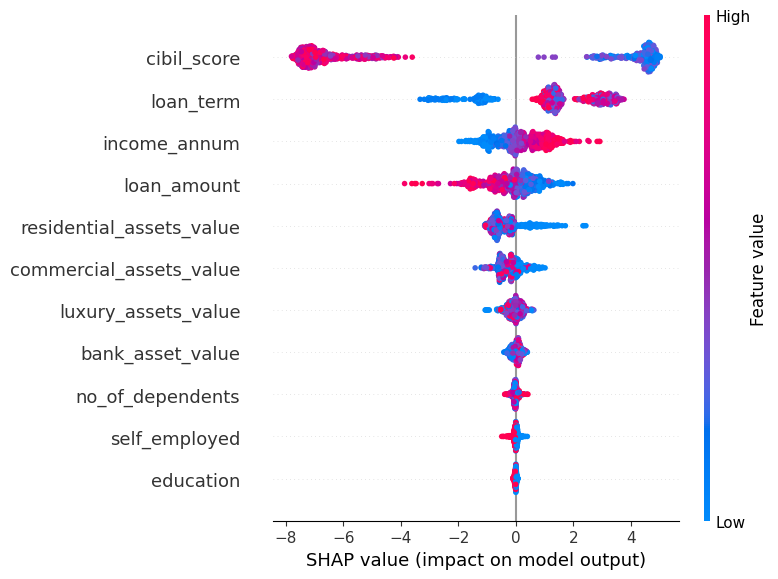

In [20]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [21]:
joblib.dump(best_model, "credit_risk_model.pkl")

['credit_risk_model.pkl']